# Day 21

# Regularised Model


In [132]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,SGDRegressor,ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


[[1.7597712]]
[1.67918469]
[1.79940584]
[1.70783046]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


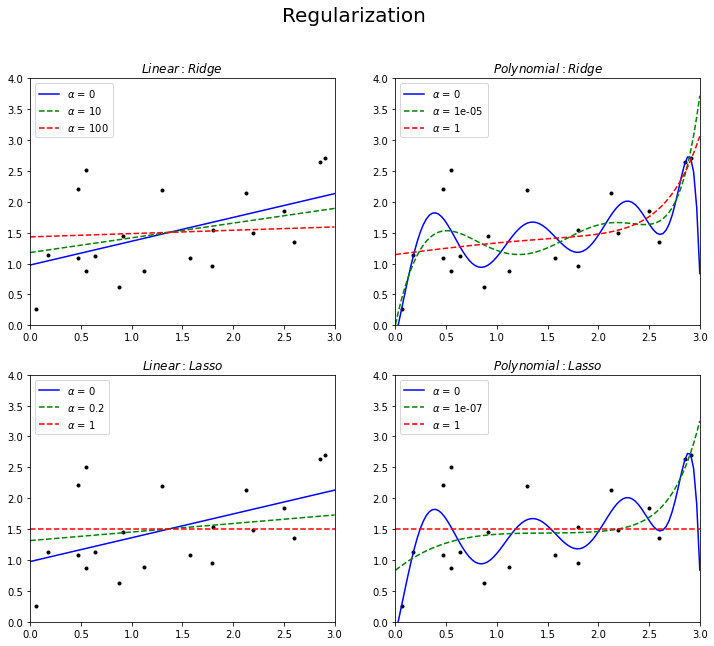

In [212]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)
def plot_reg_model(model, name, poly, subplot, alphas):
  plt.subplot(subplot)
  plt.plot(X,y, "k.")
  plt.axis([0, 3, 0, 4])
  for alpha, style in zip(alphas, ("b-", "g--", "r--")) :
    new_model = model(alpha=alpha, 
                      random_state=42) if alpha > 0 else LinearRegression()
    plt.title(fr"$\it Linear:{name}$")
    if (poly):
      new_model = Pipeline([
               ("ploy", PolynomialFeatures(degree=10, include_bias=False)),
               ("scale", StandardScaler()),
               ("ridge", new_model)
      ])
      plt.title(fr"$\it Polynomial:{name}$")
    new_model.fit(X,y)
    y_predict = new_model.predict(X_new)
    plt.plot(X_new,y_predict, style, label=fr"$\alpha$ = {alpha}")
    plt.legend(loc="upper left")

plt.figure(figsize=(12,10))
plot_reg_model(Ridge, name="Ridge", poly=False, subplot=221, alphas=(0,10,100))
plot_reg_model(Ridge, name="Ridge", poly=True, subplot=222, alphas=(0,10**-5,1))
plt.suptitle("Regularization", fontsize = 20)
plot_reg_model(Lasso, name="Lasso", poly=False, subplot=223, alphas=(0,0.2,1))
plot_reg_model(Lasso, name="Lasso", poly=True, subplot=224, alphas=(0,10**-7,1))
plt.savefig("ridge_lasso")

ridge_model = Ridge(alpha = 0.1, solver = "sag", random_state=42)
lasso_model = Lasso(alpha = 0.1, random_state=42)
sgd_model = SGDRegressor(penalty="l2")
elt_model = ElasticNet(alpha = 0.1, l1_ratio=0.5, random_state=42)
print(ridge_model.fit(X,y).predict([[2.04]]))
print(lasso_model.fit(X,y).predict([[2.04]]))
print(sgd_model.fit(X,y).predict([[2.04]]))
print(elt_model.fit(X,y).predict([[2.04]]))

239
1.1624590535779686


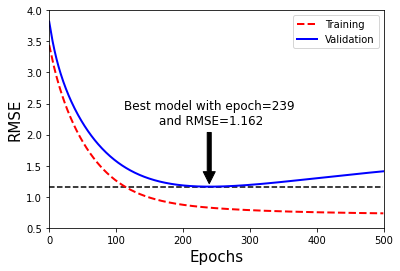

In [211]:
# Implementation of Early stopping
from copy import deepcopy
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
X_train, X_test, y_train, y_test = train_test_split(X[:50], y[:50].ravel(), 
                                   test_size=0.5, random_state=10)
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_poly = poly_scaler.fit_transform(X_train)
X_test_poly = poly_scaler.transform(X_test)
test_error_list,train_error_list=[],[]

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(500):
  sgd_reg.fit(X_train_poly, y_train) # continues where it left off
  y_train_predict = sgd_reg.predict(X_train_poly)
  y_test_predict = sgd_reg.predict(X_test_poly)
  train_error_list.append( mean_squared_error(y_train, y_train_predict))
  test_error_list.append( mean_squared_error(y_test, y_test_predict))

rmse_train = np.sqrt(train_error_list)
rmse_test = np.sqrt(test_error_list)
best_epoch = np.argmin(test_error_list)
best_rmse = rmse_test[best_epoch]
print(best_epoch)
print(best_rmse)
plt.plot(np.arange(0,500), np.repeat(best_rmse,500), "k--")
plt.plot(rmse_train, "r--", lw=2, label="Training")
plt.plot(rmse_test, "b-", lw=2, label="Validation")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.axis([0,500,0.5,4])
plt.annotate(f"Best model with epoch={best_epoch}\n and RMSE={round(best_rmse,3)}", 
             xy=(best_epoch,best_rmse),
             xytext=(best_epoch, best_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)
plt.legend(loc="upper right")
plt.savefig("Early_stop")